In [92]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
from matplotlib import cm

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from scipy.stats import ttest_ind

from acquire import *
from prepare import *

In [3]:
df = prep_iris(get_iris_data())

In [4]:
df.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_encode
0,setosa,5.1,3.5,1.4,0.2,0
1,setosa,4.9,3.0,1.4,0.2,0
2,setosa,4.7,3.2,1.3,0.2,0
3,setosa,4.6,3.1,1.5,0.2,0
4,setosa,5.0,3.6,1.4,0.2,0


In [5]:
train_df, test_df = train_test_split(
    df, test_size=.30, random_state=123)

In [17]:
df_melt = pd.melt(train_df[['sepal_length',\
                            'sepal_width', 'petal_length',\
                            'petal_width', 'species']], 'species', var_name='variable')

In [18]:
df_melt.head()

,species,variable,value
0,virginica,sepal_length,5.8
1,virginica,sepal_length,6.3
2,versicolor,sepal_length,5.5
3,setosa,sepal_length,5.1
4,setosa,sepal_length,4.4


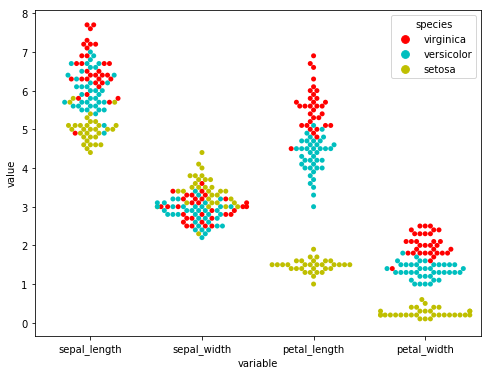

In [20]:
plt.figure(figsize=(8,6))
# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="variable", y="value", hue="species",
              palette=["r", "c", "y"], data=df_melt)

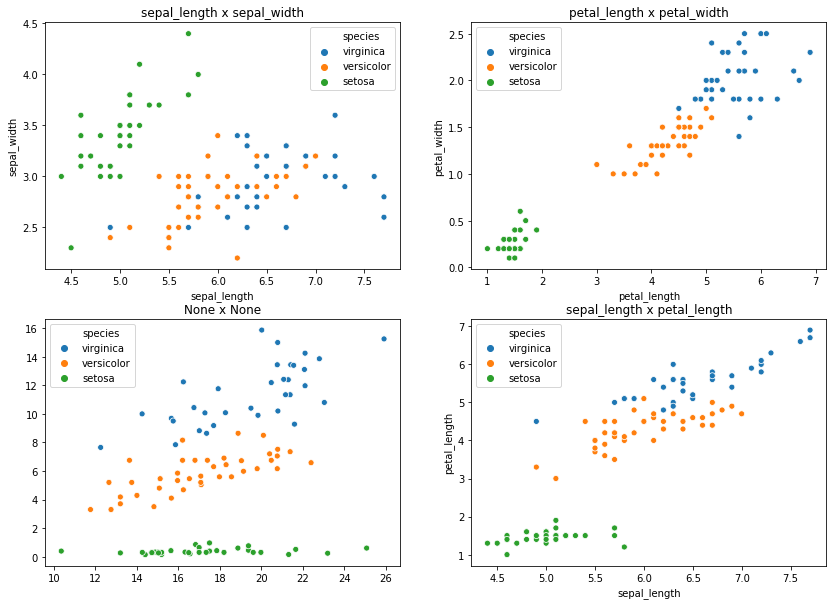

In [99]:
p1 = train_df['sepal_length']
p2 = train_df['sepal_width']
p3 = train_df['petal_length']
p4 = train_df['petal_width']

s_area = p1 * p2
p_area = p3 * p4

combos = [(p1, p2), (p3, p4), (s_area, p_area), (p1, p3)]

plt.figure(figsize=(14,10))

for i, (x, y) in enumerate(combos):
    plt.subplot(2,2, i+1)
    sns.scatterplot(x = x, y = y, hue=train_df['species'])
    plt.title(f'{x.name} x {y.name}')

Text(0.5, 1.0, 'sepal_length x petal_length')

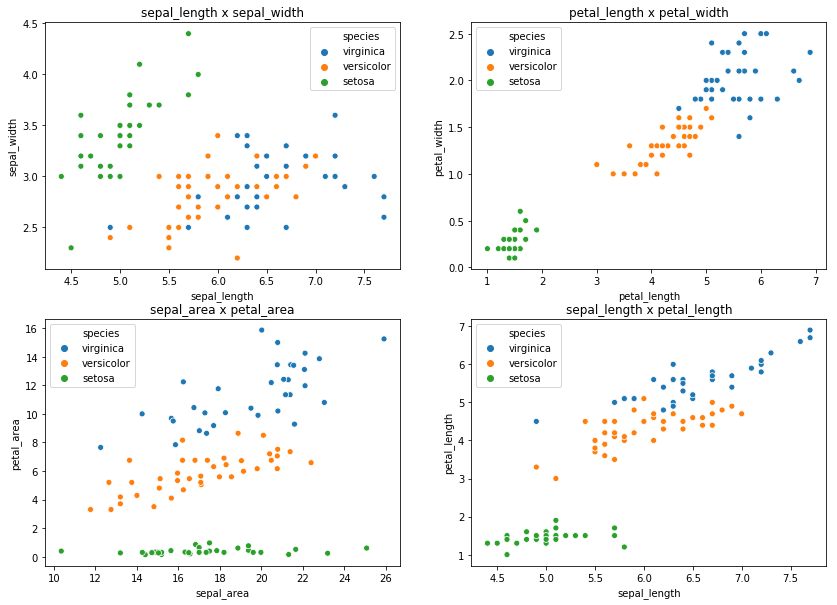

In [73]:
p1 = train_df['sepal_length']
p2 = train_df['sepal_width']
p3 = train_df['petal_length']
p4 = train_df['petal_width']

plt.figure(figsize=(14,10))

plt.subplot(2,2,1)
sns.scatterplot(x = p1, y = p2, hue=train_df['species'])
plt.title('sepal_length x sepal_width')

plt.subplot(2,2,2)
sns.scatterplot(x = p3, y = p4, hue=train_df['species'])
plt.title('petal_length x petal_width')

plt.subplot(2,2,3)
sns.scatterplot(x = (p1 * p2), y = (p3 * p4), hue=train_df['species'])
plt.title('sepal_area x petal_area')
plt.xlabel('sepal_area')
plt.ylabel('petal_area')

plt.subplot(2,2,4)
sns.scatterplot(x = p1, y = p3, hue=train_df['species'])
plt.title('sepal_length x petal_length')

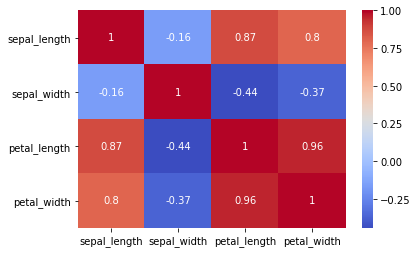

In [55]:
sns.heatmap(train_df.drop(columns=(['species', 'species_encode'])).corr(), annot=True, cmap='coolwarm')

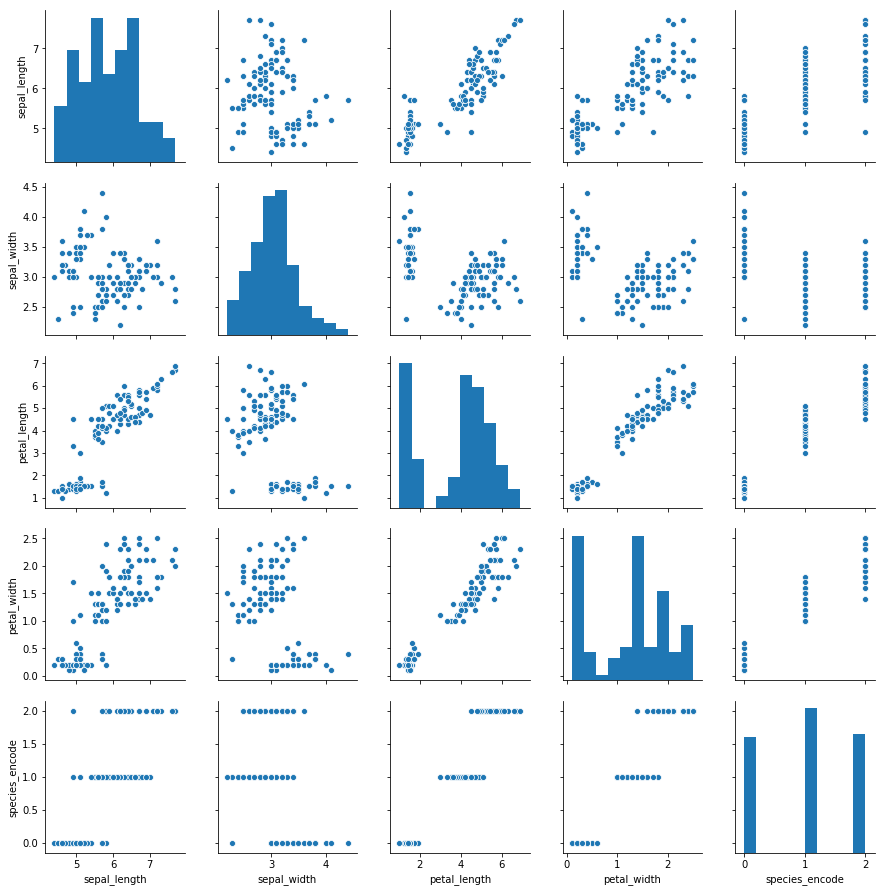

In [56]:
sns.pairplot(train_df)

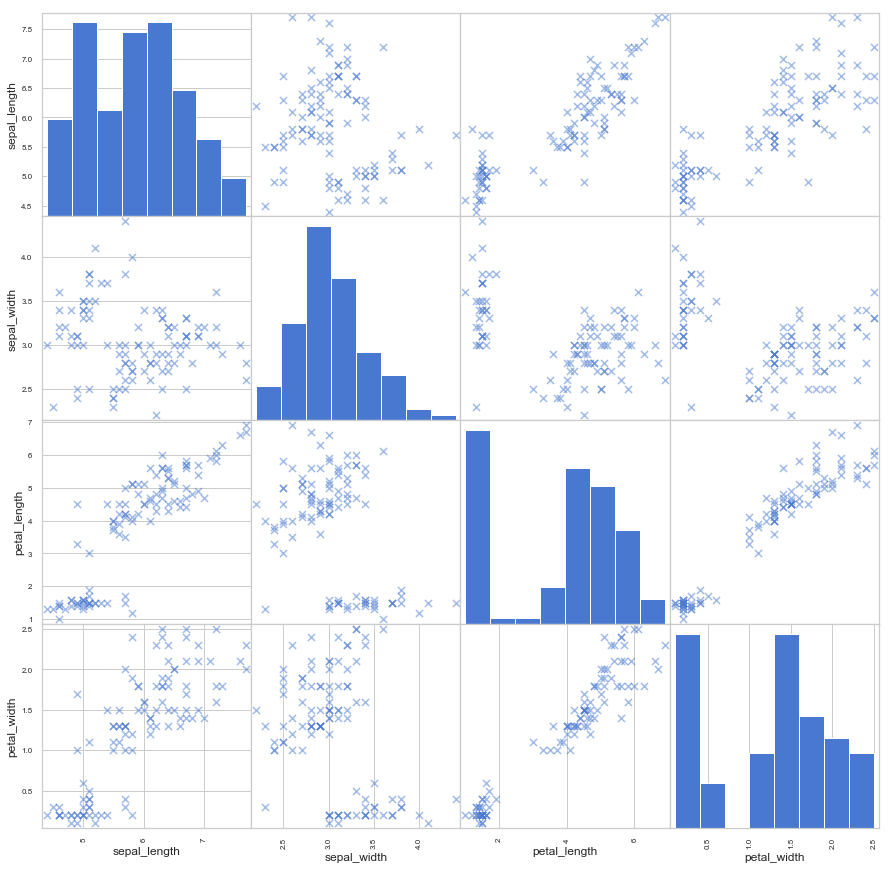

In [117]:
cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(
    train_df[['sepal_length','sepal_width','petal_length', 'petal_width']],diagonal='hist', marker='x', s=50,
    hist_kwds={'bins':8},  figsize=(15,15), cmap=cmap)

### Is the sepal length significantly different in virginica than versicolor? Run an experiment to test this.
* must include null hypothesis, alternative hyp, t-test, results, summary
* $H_0$: the difference in sepal length between virginica and versicolor is insignificant.
* $H_a$: the difference in sepal length between virginica and versicolor is substantial.
* We will test if the sepal length of virginica is significantly different than that of the versicolor.
* If there is difference, then variable sepal_length is a good choice to keep as a feature.
* We can use a t-test here, as sepal_length is somwhat normally distributed.

In [88]:
virginica = train_df[train_df.species == 'virginica']
versicolor = train_df[train_df.species == 'versicolor']

In [98]:
ttest_ind(virginica.sepal_length, versicolor.sepal_length)

Ttest_indResult(statistic=4.232219188580116, pvalue=6.811720108343317e-05)

In [101]:
df2 = prep_titanic(get_titanic_data())

In [102]:
df2.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,embarked_encode
0,0,0,3,male,22.0,1,0,7.2500,S,Third,Southampton,0,3
1,1,1,1,female,38.0,1,0,71.2833,C,First,Cherbourg,0,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,Southampton,1,3
3,3,1,1,female,35.0,1,0,53.1000,S,First,Southampton,0,3
4,4,0,3,male,35.0,0,0,8.0500,S,Third,Southampton,1,3


In [106]:
df2 = df2.dropna()
df2.isnull().sum()

passenger_id       0
survived           0
pclass             0
sex                0
age                0
sibsp              0
parch              0
fare               0
embarked           0
class              0
embark_town        0
alone              0
embarked_encode    0
dtype: int64

In [108]:
train_df2, test_df2 = train_test_split(df2, test_size=.30, random_state=123, stratify=df2[['survived']])

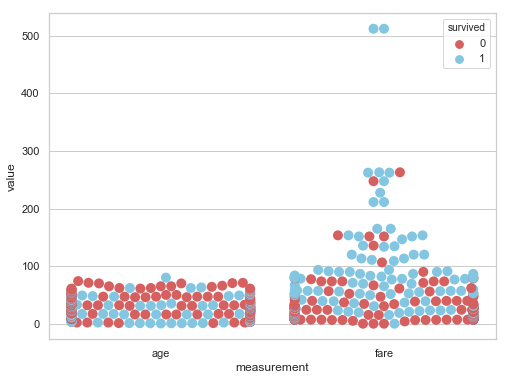

In [110]:
sns.set(style="whitegrid", palette="muted")

# "Melt" the dataset to "long-form" representation
df_melt2 = pd.melt(train_df2[['survived','age','fare']], "survived", var_name="measurement")

plt.figure(figsize=(8,6))
# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="measurement", y="value", hue="survived",
              palette=["r", "c", "y"], data=df_melt2, size=10)

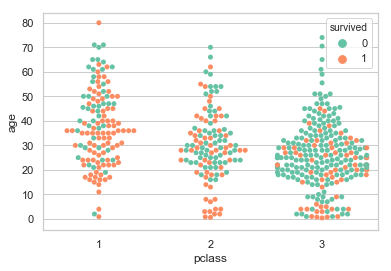

In [111]:
sns.swarmplot(x="pclass", y="age", data=train_df2, hue="survived", palette="Set2")

In [115]:
print(ttest_ind(train_df2[train_df2.survived == 1].age.dropna(),train_df2[train_df2.survived == 0].age.dropna()))

# is the t-statistic < -1.96 or > 1.96?  if so, then look at p-value to ensure it is less than our alpha of .05.



Ttest_indResult(statistic=-2.012224018867312, pvalue=0.04473535126710687)
